# Exploratory Data Analysis: Examining Distributions

### 1. EDA Overview

In order to convert raw data to meaningful information, we need to summarize and examine the distribution of the variable.
By distribution of variable, I mean 
1. Values the variable can take
2. How often the variable takes those values

### 2. Data and Variables

**Data** are pieces of information about *individuals* organized into *variables*. 
**Individual** is a particular person or object under analysis. 
**Variable** is a particular characteristic of the individual

**Dataset** is a collection of data identified under certain circumstances. Usually, it is organized in a table format, where rows denote the individuals and columns are the different variables

#### 2.1 Variables

Variables can be classified into two types: Categorical and Numerical  

**Categorical** variables take only one label/category as value, where categories are mutually exclusive. They have no arithmetic meaning (i.e., it does not make sense to add, subtract, multiply, divide, or compare the magnitude of such values)  

**Numerical** variables take numeric values and denote some kind of measurement

Above is a simple classification of data. A more precise distinction between types of data can be given by **Scale of Measurement**. There are four scales of measurement, from least to most precise:
1. **Nominal**: These are discrete qualitative categories. The categories have no quantitative value and have no order among them whatsoever. Examples are *religion*, *marital status*, etc. 

2. **Ordinal**: These are similar to nominal, however, the values have an implicit ordering/ranking. A unit increase in variable of this type represents *more*, but doesn't say by how much. Even though numbers maybe used, they are used only to denote importance of variable and make no sense to apply arithmetics on it. Example *Ratings, Car condition*, etc.

3. **Interval**: Takes numerical form, and the distance between pairs of consecutive numbers is assumed to be equal. However, interval variables do not have a meaningful zero point; thus, a zero does not mean the absence of the attribute, but rather it is a particular (but arbitrary) point on the scale. A good example of an interval measure is *temperature in the Fahrenheit scale*: a temperature of zero degrees Fahrenheit is still a temperature, not the absence of temperature.

4. **Ratio**: Similar to the interval scale. As with the interval scale, a number is assigned to a subject that represents the amount of the attribute that the subject has and the difference between consecutive numbers is assumed to be equal. The main difference between interval and ratio measurements has to do with how we interpret a value of zero. For ratio measures, the zero is meaningful and tell us that the attribute is not present in the participant. Examples of ratio measures include *a participant’s number of children, number of AP courses taken*, etc.

![](files/datatypes.png)

A brief summary of types of variables:

<table>
    <thead>
        <td><strong>Type</td>
        <td><strong>Central Tendency</td>
        <td><strong>Visualizations</td>
        <td><strong>Information</td>
    </thead>
    <tbody>
    <tr>
        <td>Nominal</td>
        <td>Mode</td>
        <td>Pie, Bar</td>
        <td>frequency, percentage, proportion</td>
    </tr>
    <tr>
        <td>Oridnal</td>
        <td>Median</td>
        <td>Pie, Bar</td>
        <td>above and percentiles, median, mode and the interquartile range</td>
    </tr>
    <tr>
        <td>Interval</td>
        <td>Mean, Deviation</td>
        <td>Histogram, Boxplot</td>
        <td>percentiles, median, interquartile range, mean, mode, median, standard deviation, and range</td>
    </tr>
    <tr>
        <td>Ratio</td>
        <td>Geometric mean, Coefficient of variation</td>
        <td>Histgram, Boxplot</td>
        <td>percentiles, median, interquartile range, mean, mode, median, standard deviation, and range</td>
    </tr>
    </tbody>
</table>

### 3. One Categorical Variables

#### 3.1 Frequency Distributions

> A frequency distribution is a table listing each distinct value of some variable and the number of times it occurs in some dataset.


In short, a frequency distribution is a table showing how frequencies are distributed over values. Let's take a look at some examples. We recently taught a course to 183 students and we asked them to evaluate it by filling out a brief questionnaire. Part of the data we collected are shown below.

![](https://spss-tutorials.com/img/frequency-distribution-raw-data-view-2.png)


One of the first ways to gain some insight into our data is inspecting which values are present in our variables and how often these occur. That is, we'll inspect frequency distributions, one of which is shown below.

![](https://spss-tutorials.com/img/frequency-distribution-1.png)

#### 3.2 Cumulative Percentages

A cumulative percentage is the percentage for some value plus the percentages for all values that precede it.

![](https://spss-tutorials.com/img/frequency-distribution-cumulative-percent.png)

#### 3.3 Visualizations

In order to visualize the numerical summaries we've obtained, we need a graphical display. There are two simple graphical displays for visualizing the distribution of categorical data: Pie chart and Bar graph

### Exercise

#### _Using R_

In [2]:
load("../files/friends.RData")

In [5]:
head(friends)

Friends
No difference
No difference
No difference
No difference
No difference
No difference


In [9]:
t = table(friends$Friends)
t


No difference  Opposite sex      Same sex 
          602           434           164 

In [10]:
p = prop.table(t)
p


No difference  Opposite sex      Same sex 
    0.5016667     0.3616667     0.1366667 

In [11]:
percent = p * 100
percent


No difference  Opposite sex      Same sex 
     50.16667      36.16667      13.66667 

In [16]:
percent = round(x = percent, digits = 1)
percent


No difference  Opposite sex      Same sex 
         50.2          36.2          13.7 

In [28]:
lbl = paste(c("No difference","Opposite sex","Same sex"), percent, "%", sep=" ")

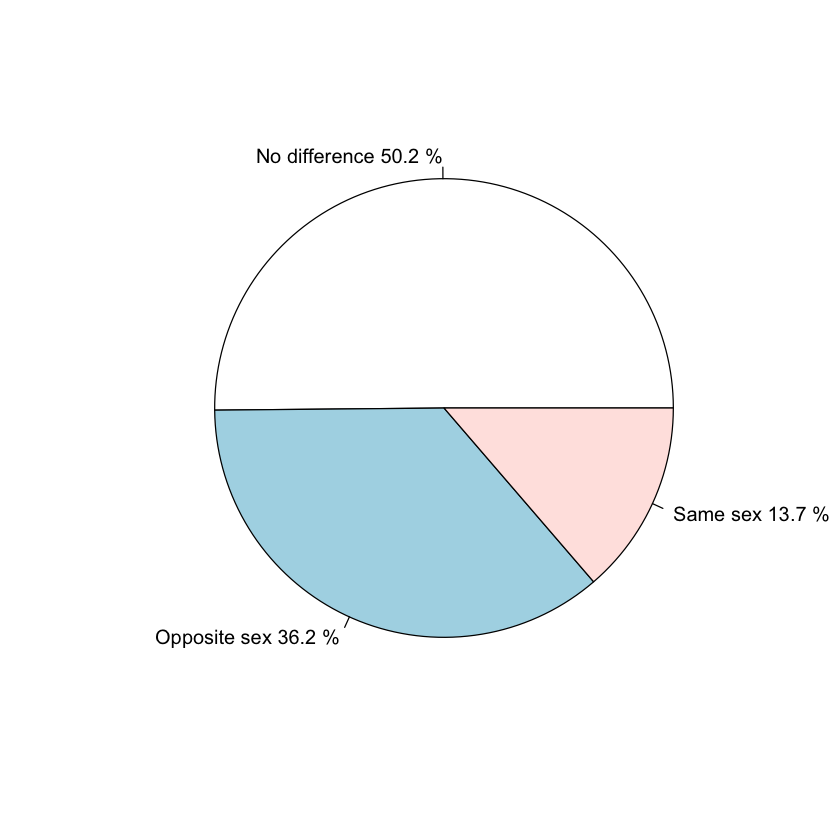

In [29]:
pie(x = percent, labels = lbl)

#### _Using Python_

In [1]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
from plotly.offline import init_notebook_mode, plot, iplot
init_notebook_mode(True)

import plotly.graph_objs as go
import pygal

In [2]:
friends_df = pd.read_excel("files/friends.xls")

In [3]:
friends_df.head()

,Friends
0,Opposite sex
1,No difference
2,Opposite sex
3,No difference
4,Opposite sex


In [4]:
friends_df.Friends.value_counts()

No difference    602
Opposite sex     434
Same sex         164
Name: Friends, dtype: int64

In [5]:
percent = (friends_df.Friends.value_counts() / len(friends_df) * 100).round(decimals = 1)
percent

No difference    50.2
Opposite sex     36.2
Same sex         13.7
Name: Friends, dtype: float64

In [6]:
lbl = [f"{x} {y} %" for x, y in percent.items()]

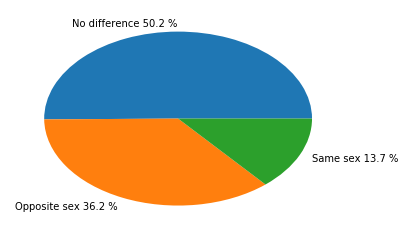

In [7]:
plt.pie(x=percent, labels=lbl)
plt.show()

In [8]:
p = go.Pie(labels=lbl, values=percent)
iplot([p])

### 4 One Quantitative Variable: Graphs

In this section, we will explore the data collected from a quantitative variable, and learn how to describe and summarize the important features of its distribution. We will first learn how to display the distribution using graphs and then move on to discuss numerical measures.

To display data from one quantitative variable graphically, we can use either the *histogram* or the *stemplot*. (Another graph, the *boxplot*, will be covered in another section).

#### 4.1 Histograms

Here are the exam grades of 15 students:

>88, 48, 60, 51, 57, 85, 69, 75, 97, 72, 71, 79, 65, 63, 73

We first need to break the range of values into intervals (also called "bins" or "classes"). In this case, since our dataset consists of exam scores, it will make sense to choose intervals that typically correspond to the range of a letter grade, 10 points wide: 40-50, 50-60, ... 90-100. 

To construct the histogram from this table we plot the intervals on the X-axis, and show the number of observations in each interval (frequency of the interval) on the Y-axis

![](files/hist.png)

##### **Interpreting the Histogram**

Once the distribution has been displayed graphically, we can describe the overall pattern of the distribution and mention any striking deviations from that pattern. More specifically, we should consider the following features of the distribution:
- Shape
- Center
- Spread
- Outliers

**Shape**  
When describing the shape of a distribution, we should consider:
- Symmetry/skewness of the distribution.
- Peakedness (modality)—the number of peaks (modes) the distribution has.

*Symmetric Distributions*

![](https://lagunita.stanford.edu/assets/courseware/v1/555d1de4be33e15667b6fe7fb76ab540/asset-v1:OLI+ProbStat+Open_Jan2017+type@asset+block/eda_examining_distributions_histogram2.gif)
![](https://lagunita.stanford.edu/assets/courseware/v1/53757a95fdab73950f0ba6e95cac8748/asset-v1:OLI+ProbStat+Open_Jan2017+type@asset+block/eda_examining_distributions_histogram3.gif)
![](https://lagunita.stanford.edu/assets/courseware/v1/555d1de4be33e15667b6fe7fb76ab540/asset-v1:OLI+ProbStat+Open_Jan2017+type@asset+block/eda_examining_distributions_histogram4.gif)

*Skewed Right Distributions*

![](https://lagunita.stanford.edu/assets/courseware/v1/7f651a599f939542cf929479d2086c23/asset-v1:OLI+ProbStat+Open_Jan2017+type@asset+block/eda_examining_distributions_histogram5.gif)

A distribution is called right skewed if it has a longer tail on its right side. Note that in a skewed right distribution, the bulk of the observations are small/medium, with a few observations that are much larger than the rest. An example of a real-life variable that has a skewed right distribution is salary. Most people earn in the low/medium range of salaries, with a few exceptions (CEOs, professional athletes etc.) that are distributed along a large range (long "tail") of higher values.

*Skewed Left Distributions*

![](https://lagunita.stanford.edu/assets/courseware/v1/a4d03a54ca15682bab2c45d852589cb6/asset-v1:OLI+ProbStat+Open_Jan2017+type@asset+block/eda_examining_distributions_histogram6.gif)

A distribution is called skewed left if, as in the histogram above, the left tail (smaller values) is much longer than the right tail (larger values). Note that in a skewed left distribution, the bulk of the observations are medium/large, with a few observations that are much smaller than the rest. An example of a real life variable that has a skewed left distribution is age of death from natural causes (heart disease, cancer etc.)

**Center**  
The center of the distribution is its midpoint—the value that divides the distribution so that approximately half the observations take smaller values, and approximately half the observations take larger values. Note that from looking at the histogram we can get only a rough estimate for the center of the distribution.

**Spread**  
The spread (also called variability) of the distribution can be described by the approximate range covered by the data. From looking at the histogram, we can approximate the smallest observation (min), and the largest observation (max), and thus approximate the range. (More exact ways of finding measures of spread will be discussed in the next section.)

In our example:

- approximate min: 45 (the middle of the lowest interval of scores)
- approximate max: 95 (the middle of the highest interval of scores)
- approximate range: 95-45=50

**Outliers**  
Outliers are observations that fall outside the overall pattern. For example, the following histogram represents a distribution that has a high probable outlier:
![](https://lagunita.stanford.edu/assets/courseware/v1/fadf37cdaf9eef53bd19c51e2ad1d4c7/asset-v1:OLI+ProbStat+Open_Jan2017+type@asset+block/eda_examining_distributions_histogram7.gif)


### Exercise

#### *Using R*

In [1]:
load("files//actor_2013.RData")

In [3]:
head(actor_age)

Age
43
42
48
49
56
38


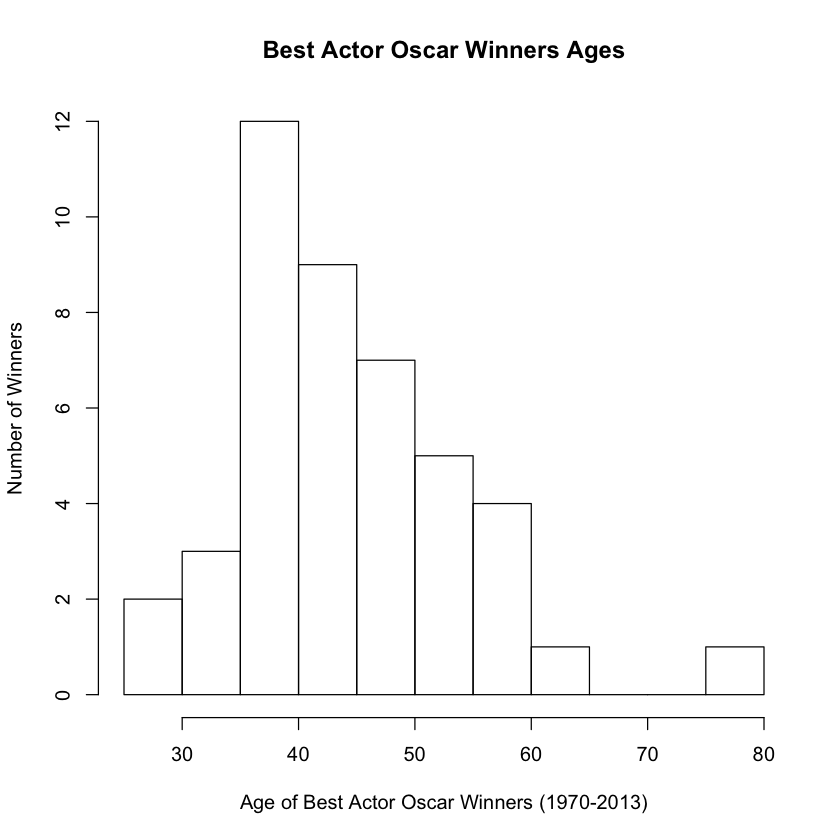

In [5]:
hist(actor_age$Age, xlab = "Age of Best Actor Oscar Winners (1970-2013)", ylab = "Number of Winners", 
     main="Best Actor Oscar Winners Ages")

#### *Using Python*

In [1]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
from plotly.offline import init_notebook_mode, plot, iplot
init_notebook_mode(True)

import plotly.graph_objs as go

In [2]:
actors = pd.read_excel("files/actor_2013.xls")
actors.head()

,Age
0,43
1,42
2,48
3,49
4,56


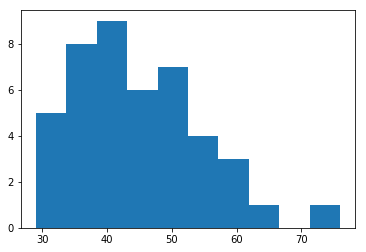

In [3]:
actors.Age.hist(grid=False)

In [10]:
age_hist = [go.Histogram(x=actors.Age.values)]
iplot(age_hist)

#### 4.2 Final views on Histogram:

Advantages:
The advantages of the histogram as compared to the unprocessed data are:

- It gives range of the data.
- It gives location of the data.
- it gives clue about the skewness of the data.
- It gives information about the out of control situation.
- Histogram are density estimates (gives a good impression of the distribution of data.
- Can be compared to normal curve.

Disadvantages:
- Exact values cannot be read from histogram because data is grouped into categories and individuality of data vanishes in grouped data.
- It is more difficult it compare two data sets.
- It is used only for continuous data set.